In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
path = 'C:/Users/gowthami/Downloads'
data = pd. read_csv('C:/Users/gowthami/Downloads/data.csv')
print(data.head(3))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38           122.8     1001.0   
1    842517         M        20.57         17.77           132.9     1326.0   
2  84300903         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   
2  ...          25.53            152.5      1709.0            0.1444   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0     

In [3]:
print(data.shape)
print(data.info())


(569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se    

In [4]:
#find null values
print('Missing values:\n{}'.format(data.isnull().sum()))

Missing values:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst

In [5]:
#data cleaning 
data.drop(['id','Unnamed: 32'], axis=1, inplace=True)
print(data.head(5))

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

diagnosis
B    357
M    212
dtype: int64


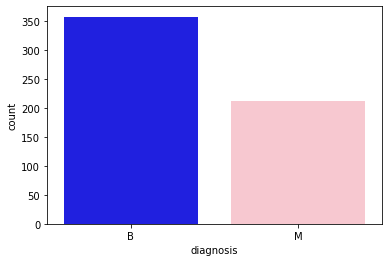

In [7]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
#2.The average perimeter size such that it is malignant tumour
perimeter_avg = data.groupby("diagnosis", as_index=True)[['perimeter_mean', 'perimeter_se', 'perimeter_worst']].mean()
print(perimeter_avg)

print("The average perimeter size such that it is malignant tumour",
      perimeter_avg.mean(axis=1))

           perimeter_mean  perimeter_se  perimeter_worst
diagnosis                                               
B               78.075406      2.000321        87.005938
M              115.365377      4.323929       141.370330
The average perimeter size such that it is malignant tumour diagnosis
B    55.693889
M    87.019879
dtype: float64


In [9]:
#3. range of radius 

#print(data[['radius_mean','radius_se','radius_worst']].min()
df_B = data[data['diagnosis']=='B']
#print(df_B.head(5))
min_range = df_B[['radius_mean','radius_se','radius_worst']].min()
print(min_range)
max_range = df_B[['radius_mean','radius_se','radius_worst']].max()
print(max_range)
range_radius  = max_range - min_range
print(range_radius)


radius_mean     6.9810
radius_se       0.1115
radius_worst    7.9300
dtype: float64
radius_mean     17.8500
radius_se        0.8811
radius_worst    19.8200
dtype: float64
radius_mean     10.8690
radius_se        0.7696
radius_worst    11.8900
dtype: float64


In [10]:
cols = list(data.columns)
cols

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

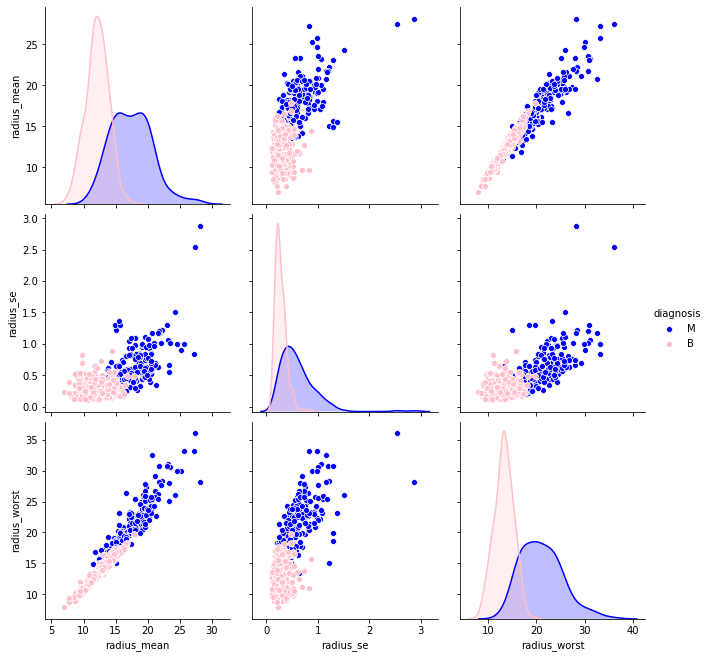

In [11]:
sns.pairplot(data, vars=["radius_mean", "radius_se","radius_worst"],
             palette=sns.color_palette(['blue', 'pink']), hue='diagnosis', height=3)
plt.show()

In [12]:
#dividing data
tumor_mean = data[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean'             
                  ,'smoothness_mean','compactness_mean','concavity_mean','concave points_mean'   
                   ,'symmetry_mean','fractal_dimension_mean']]
#standard error
tumor_ste = data[['diagnosis','radius_se','texture_se','perimeter_se','area_se','smoothness_se'         
             ,'compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se']]
#worst
tumor_worst =data[['diagnosis','radius_worst','texture_worst','perimeter_worst','area_worst'             
             ,'smoothness_worst','compactness_worst','concavity_worst','concave points_worst'   
                ,'symmetry_worst','fractal_dimension_worst']]

tumor_mean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


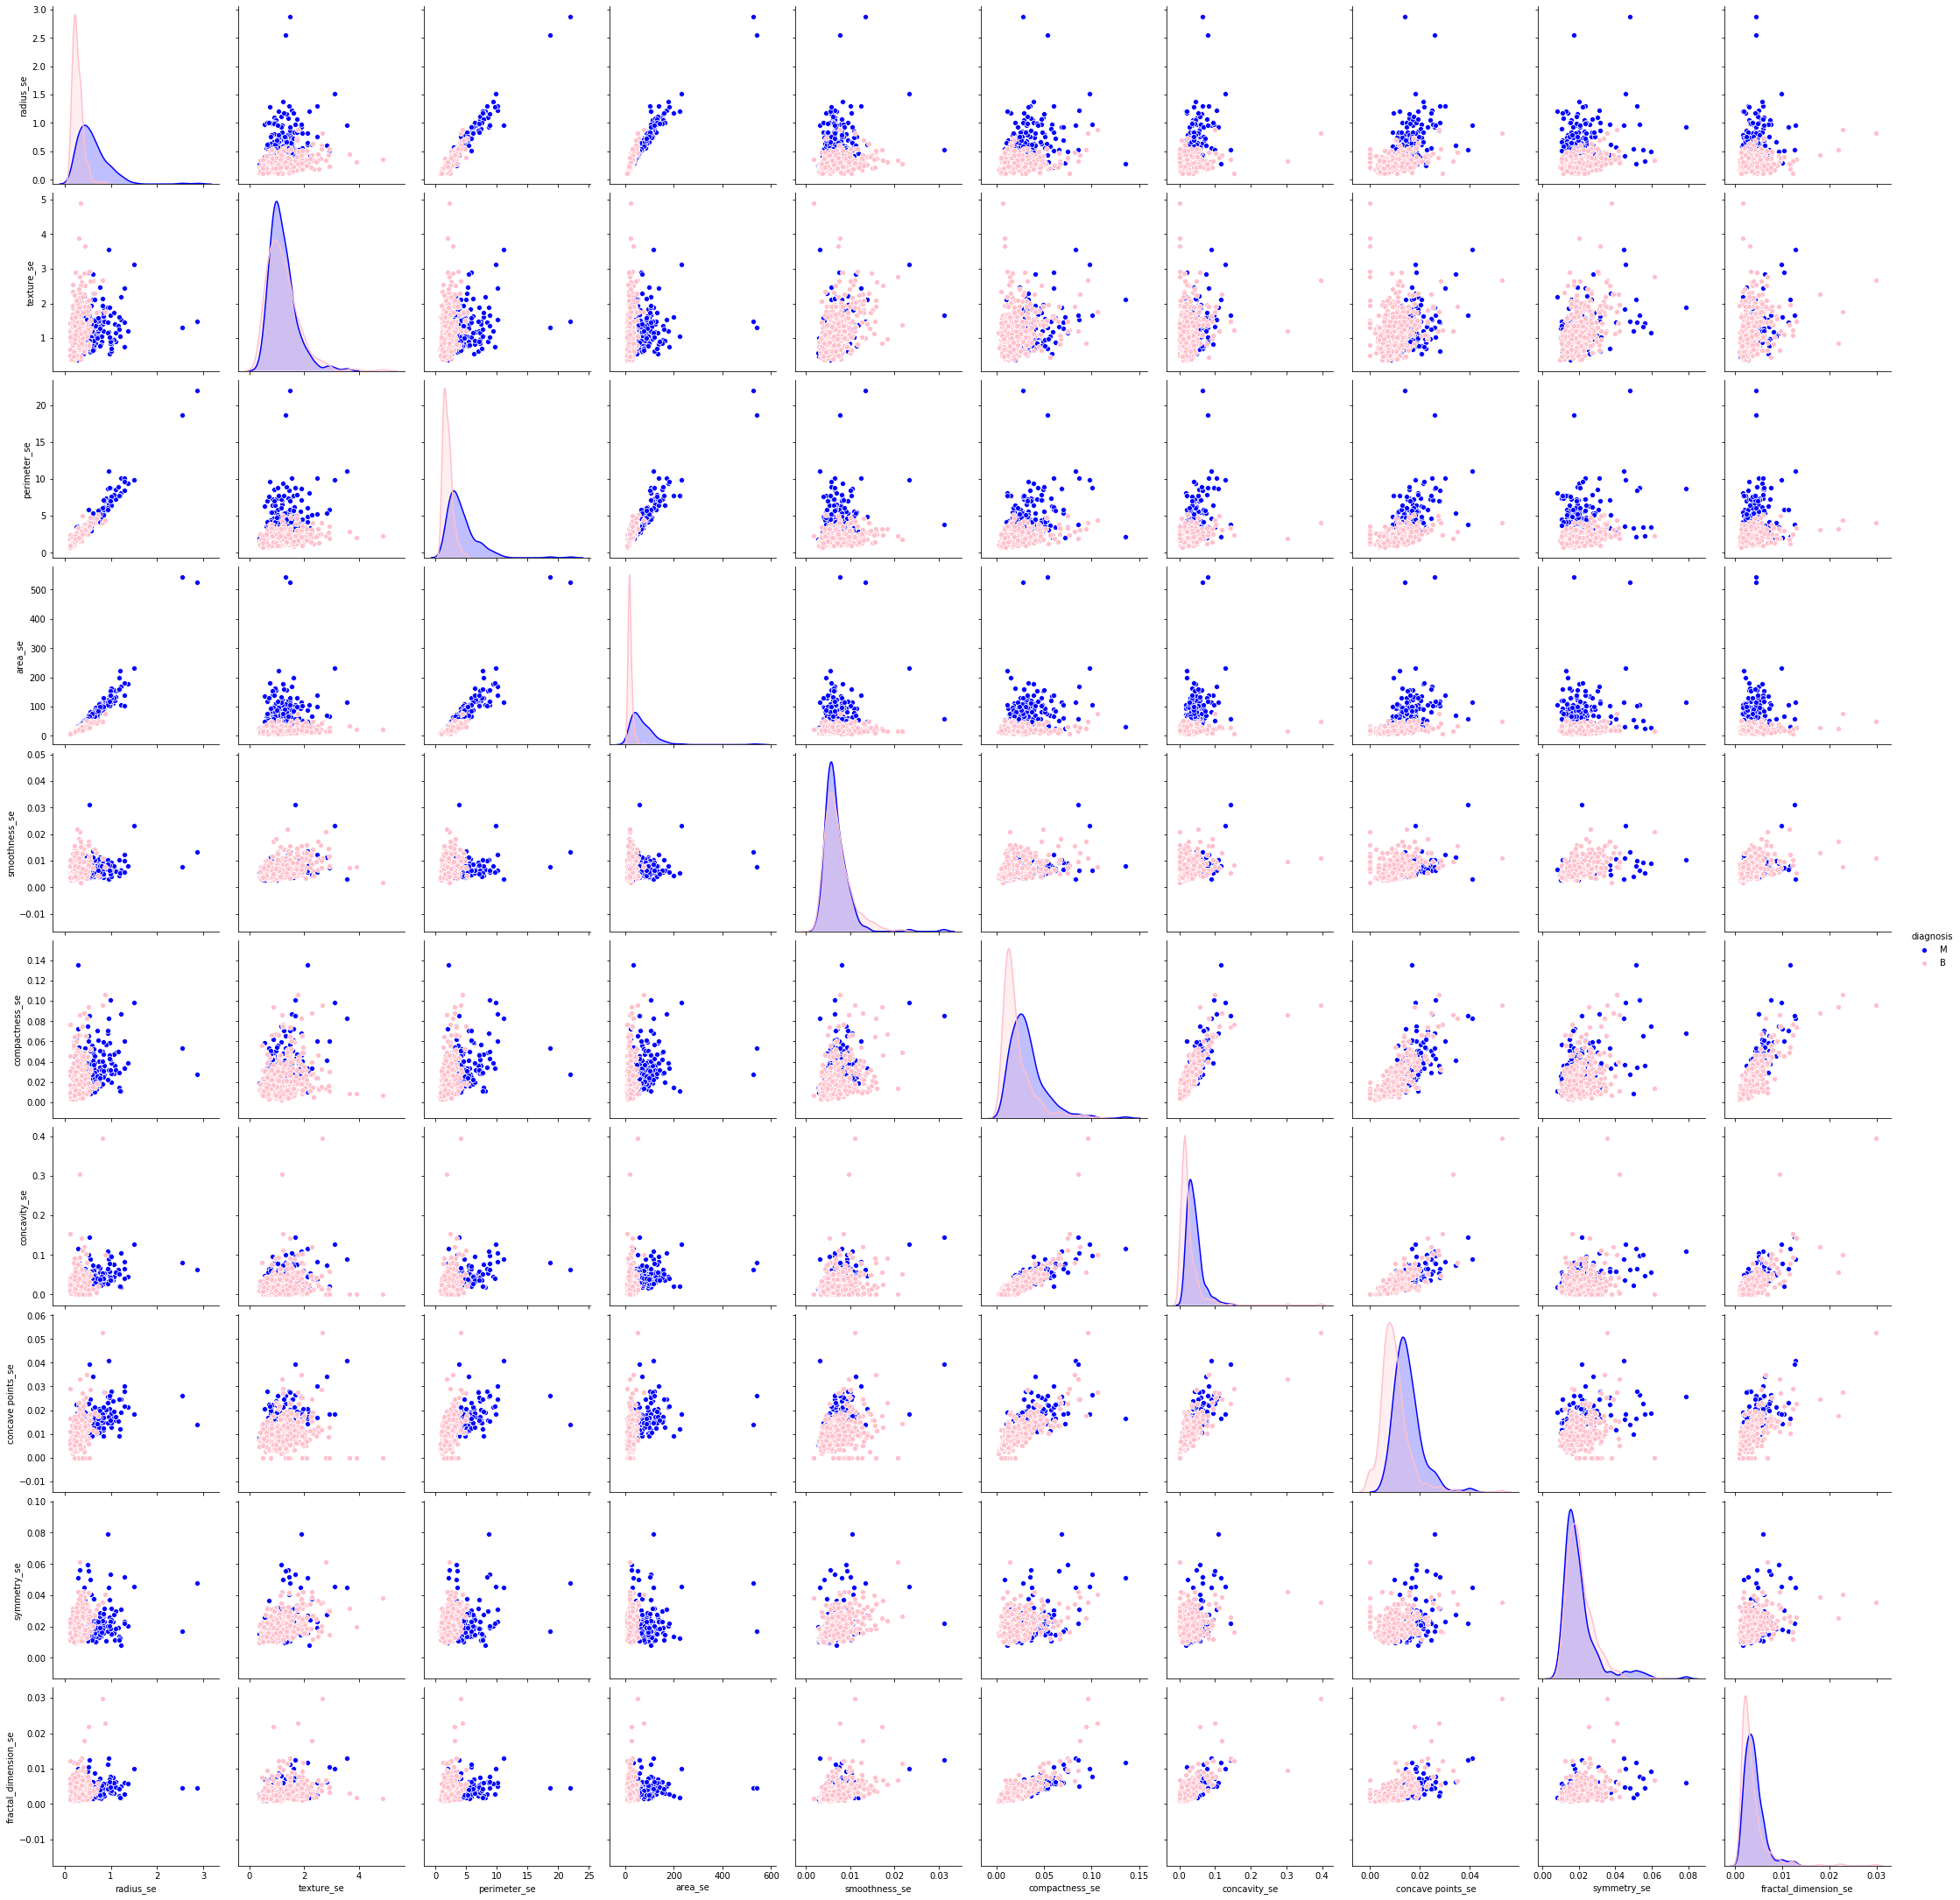

In [13]:
sns.pairplot(tumor_ste,
          palette=sns.color_palette(['blue', 'pink']), hue='diagnosis', height=3)
plt.show()

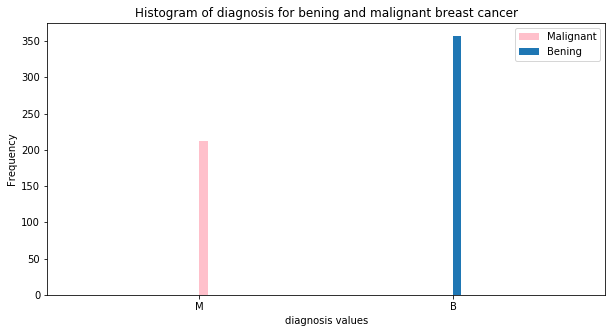

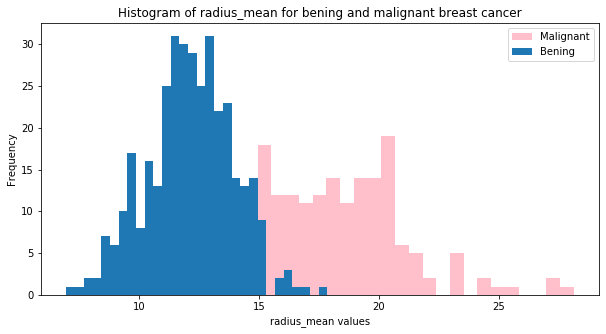

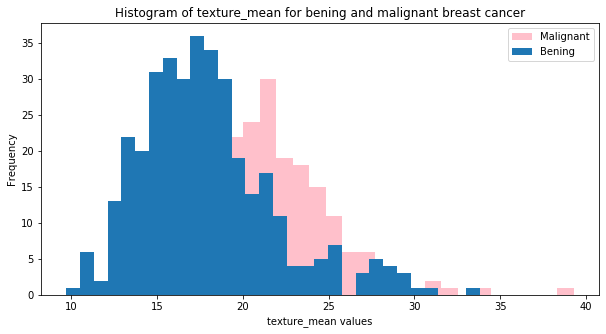

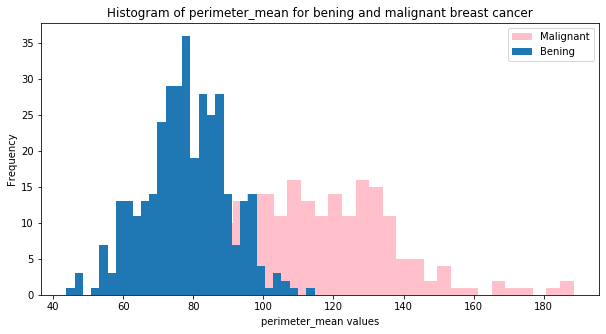

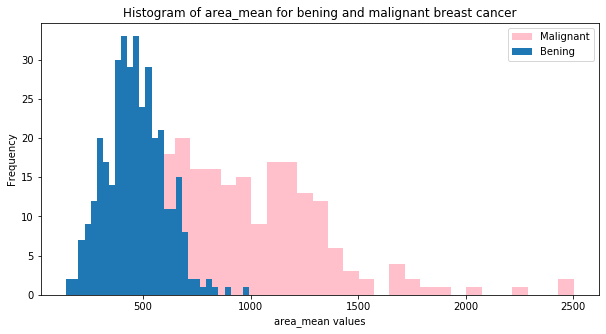

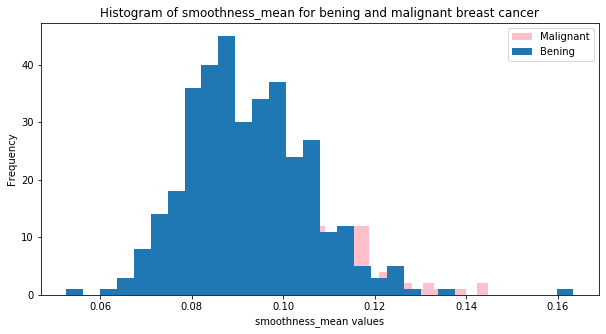

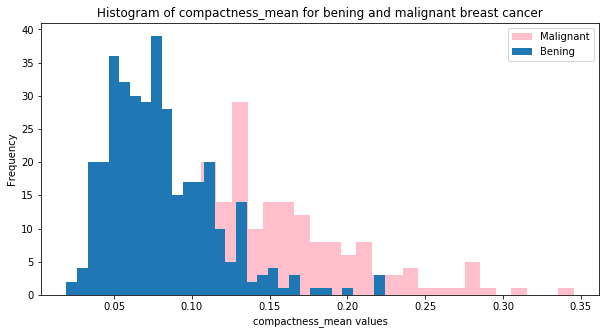

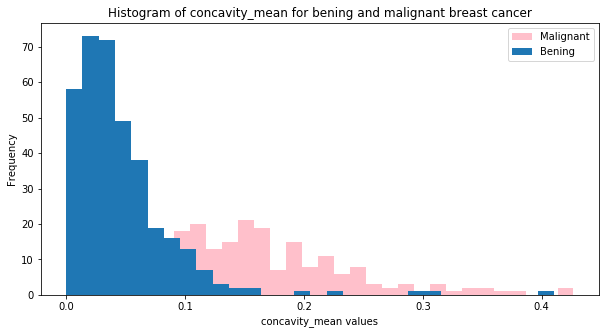

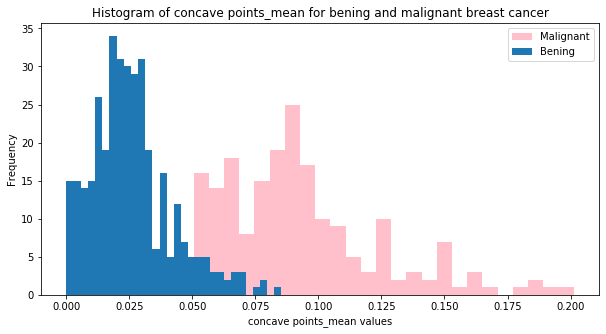

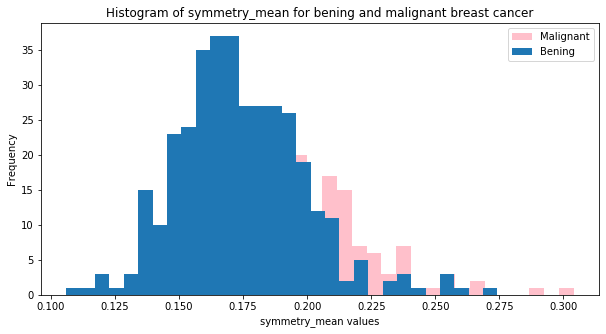

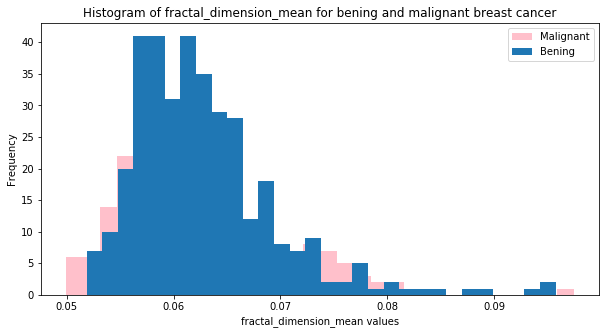

In [14]:

plt.rcParams['figure.figsize']=(10,5)
#plt.layout(4,4)
mean_value = tumor_mean.columns

#Histogram of all mean values for bening and malignant breast cancer
for i, feat in enumerate(mean_value):
    #fig = make_subplots(rows=3, cols=2)
    m = plt.hist(data[data["diagnosis"] == "M"][feat],bins=30,label = "Malignant",color ="pink")
    b = plt.hist(data[data["diagnosis"] == "B"][feat],bins=30,label = "Bening")
    plt.legend()
    plt.xlabel(mean_value[i] + ' values')
    plt.ylabel("Frequency")
    plt.title("Histogram of " + mean_value[i] +  " for bening and malignant breast cancer")
    plt.show()



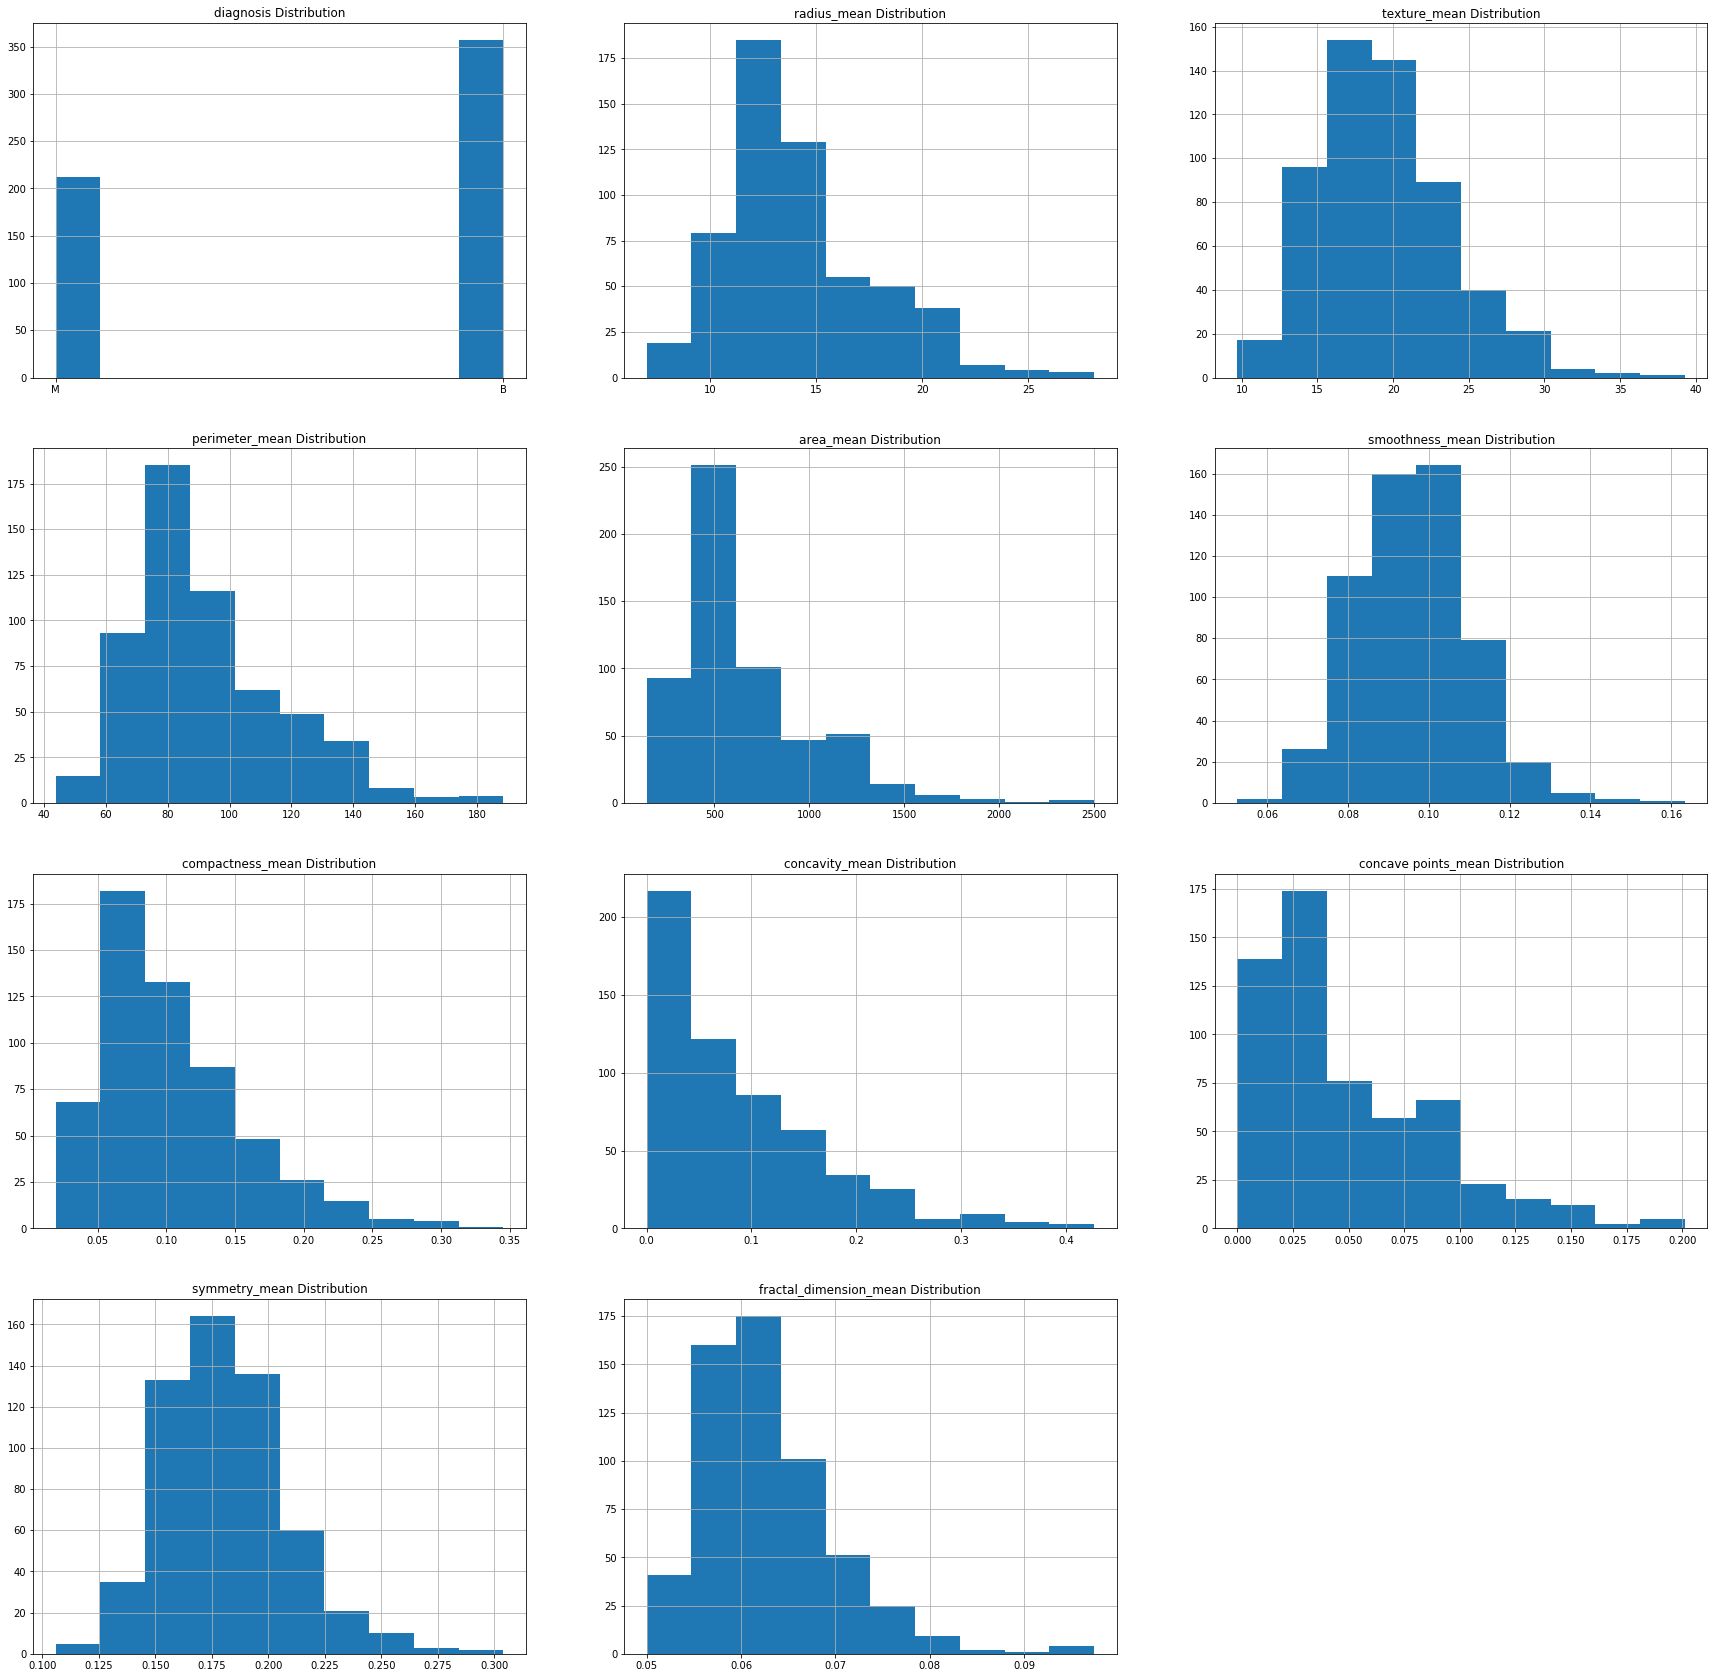

In [15]:
plt.rcParams['figure.figsize']=(30,30)

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
        
    plt.show()

        

draw_histograms(tumor_mean, tumor_mean.columns, 4,3)

------------Density Plots-----


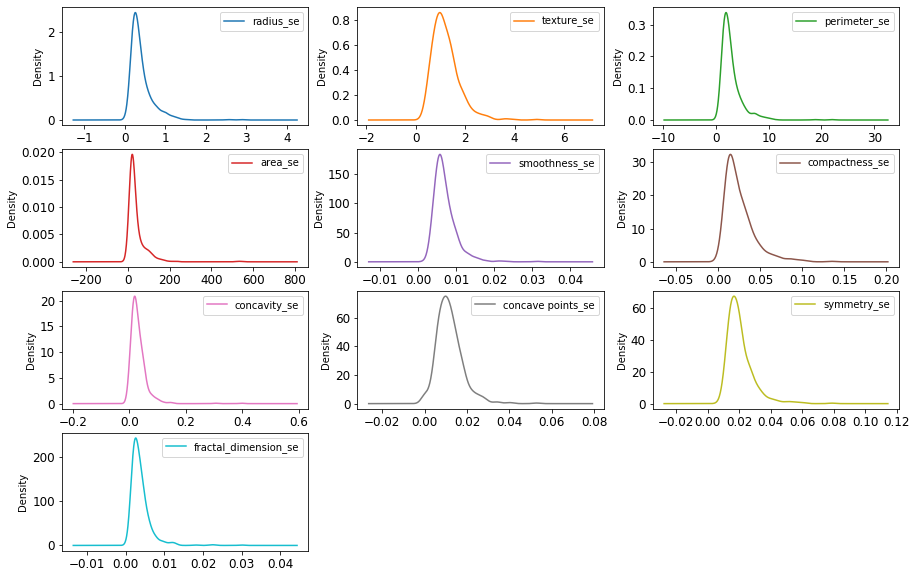

In [16]:
print('------------Density Plots-----')
#plt = tumor_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
#                     sharey=False,fontsize=12, figsize=(15,10))
plt = tumor_ste.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))
# = tumor_worst.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
#                     sharey=False,fontsize=12, figsize=(15,10))                 


-------BOX plots-----


<Figure size 720x720 with 0 Axes>

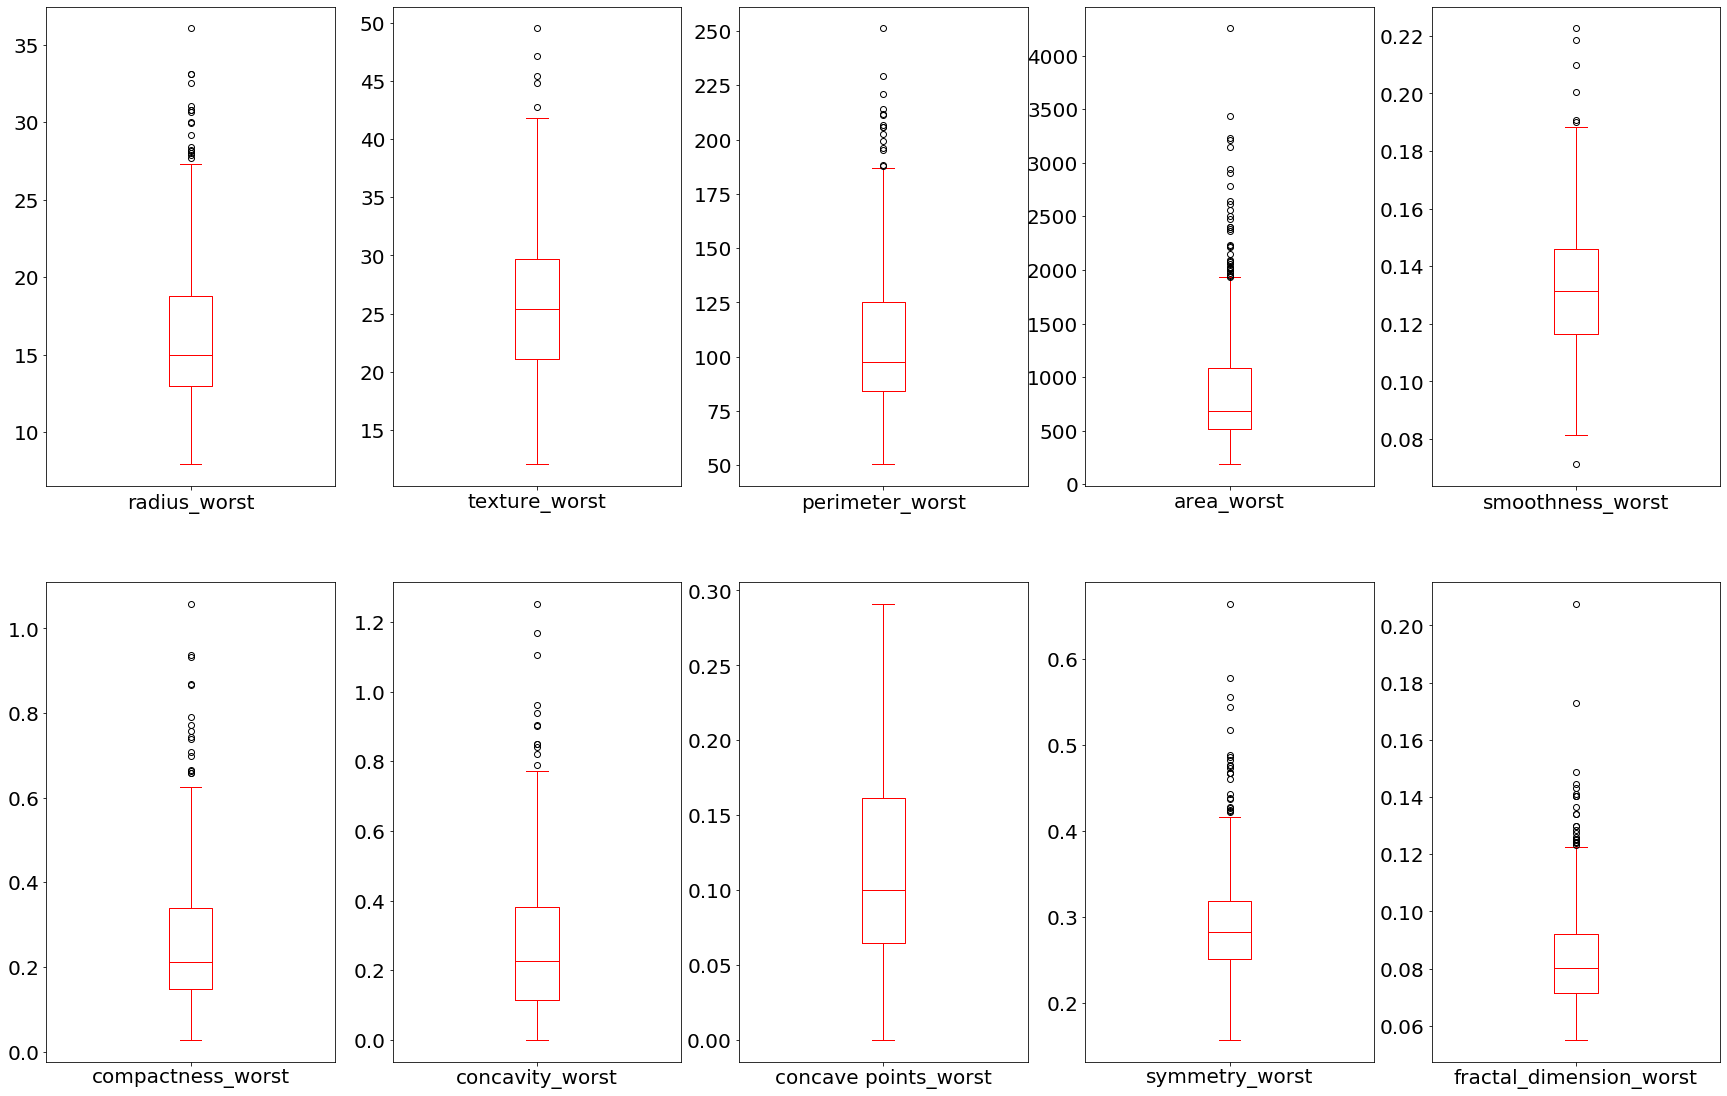

In [62]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
print('-------BOX plots-----')
#plt=tumor_mean.plot(kind= 'box' , subplots=True, layout=(3,4), sharex=False, sharey=False,fontsize=12)
#plt=tumor_ste.plot(kind= 'box' , subplots=True, layout=(3,4), sharex=False, sharey=False,fontsize=12)
plt=tumor_worst.plot(kind= 'box' , subplots=True, layout=(3,5), sharex=False, sharey=False,fontsize=20, color ='red')


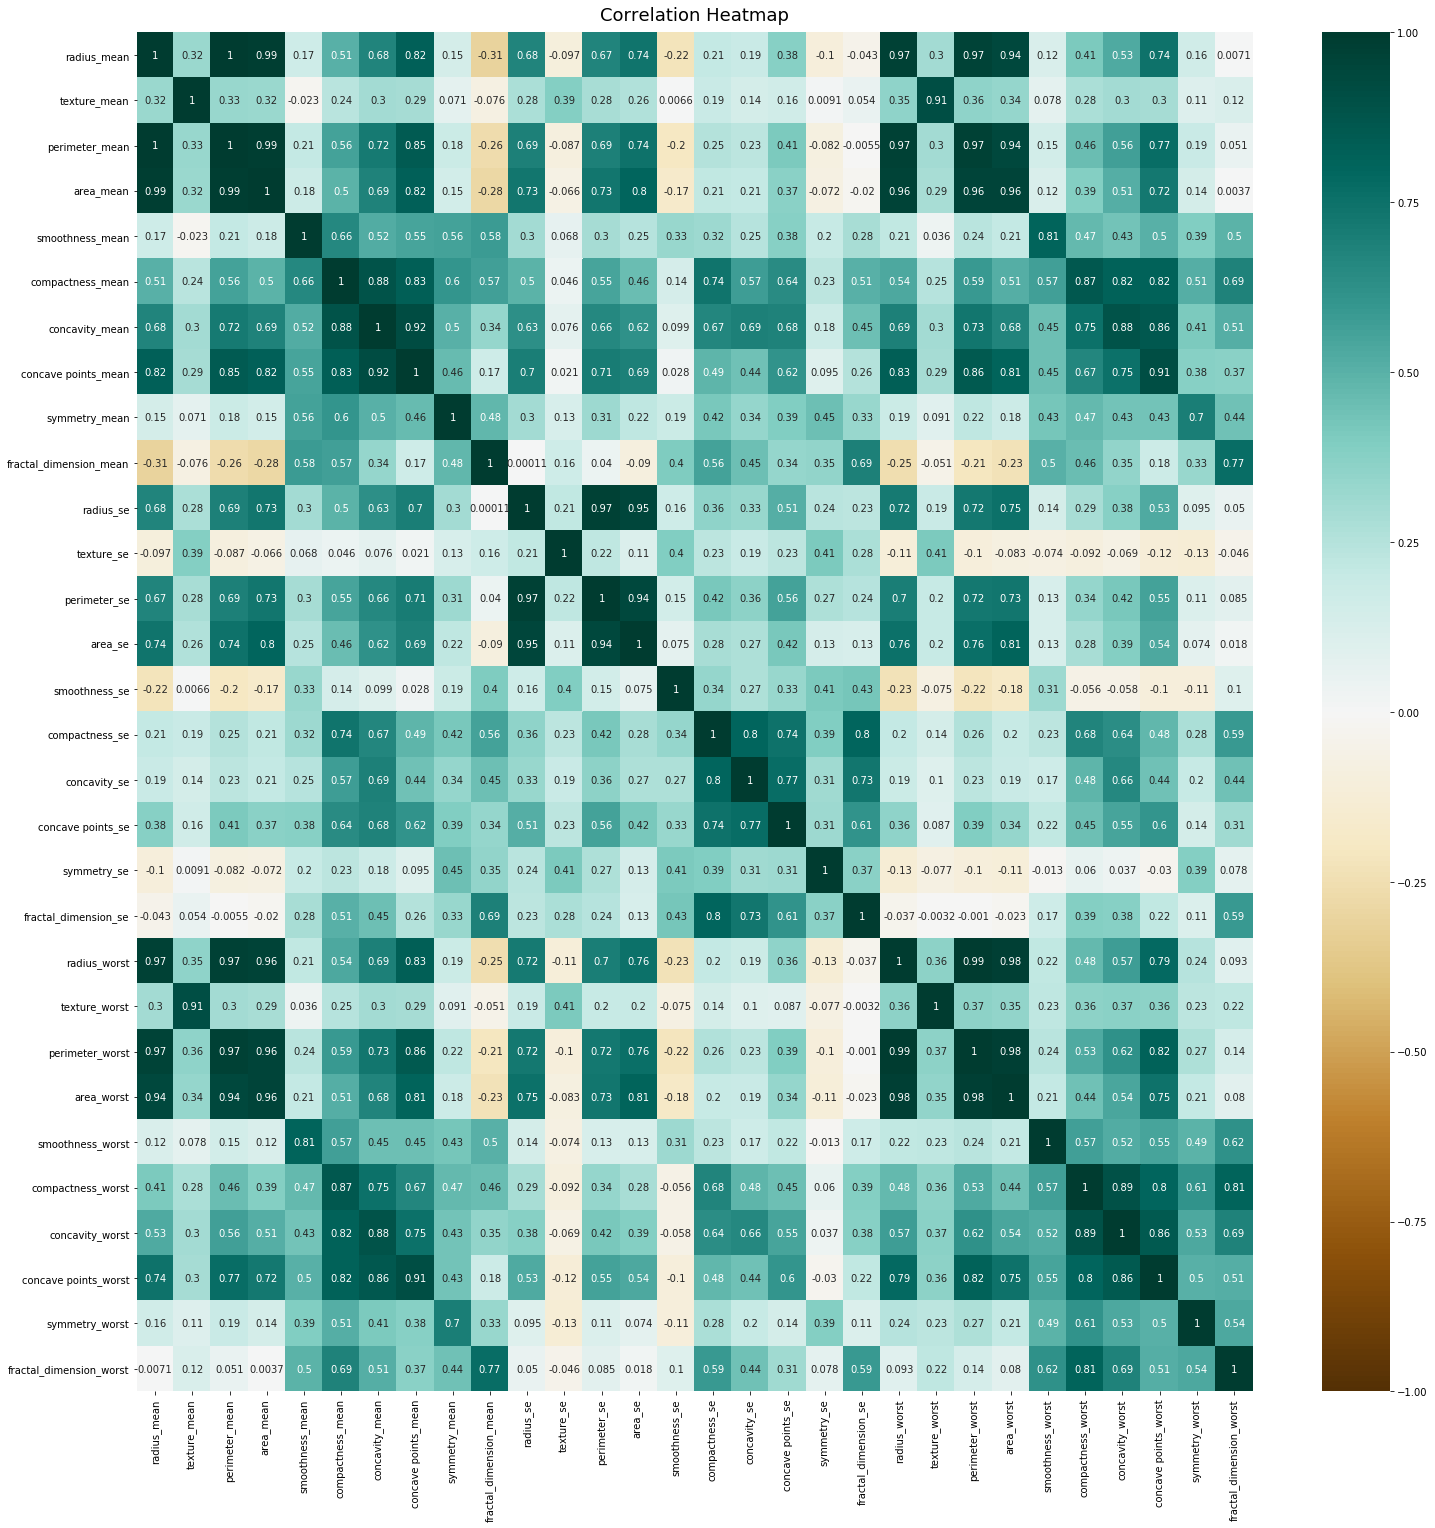

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,25))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

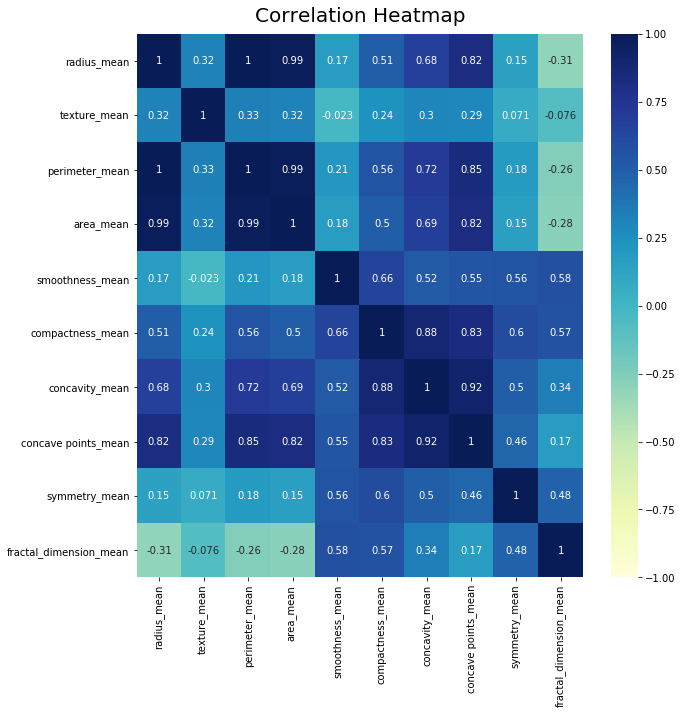

In [63]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
heatmap = sns.heatmap(tumor_mean.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

In [20]:
categories = {'B':0,'M':1}
data['diagnosis'] = data['diagnosis'].replace(categories)

In [21]:
data.drop(columns=['diagnosis']).corrwith(data['diagnosis']).sort_values(ascending=False)


concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0

In [22]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
corr_matrix = data.corr()
correlation_values = corr_matrix["diagnosis"].sort_values(ascending=False)
print(correlation_values)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [24]:
correlation_values.head(15)

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
compactness_mean        0.596534
compactness_worst       0.590998
radius_se               0.567134
perimeter_se            0.556141
Name: diagnosis, dtype: float64

In [25]:
correlation_values=correlation_values.reset_index()
correlation_values

,index,diagnosis
0,diagnosis,1.000000
1,concave points_worst,0.793566
2,perimeter_worst,0.782914
3,concave points_mean,0.776614
4,radius_worst,0.776454
5,perimeter_mean,0.742636
6,area_worst,0.733825
7,radius_mean,0.730029
8,area_mean,0.708984
9,concavity_mean,0.696360


In [26]:
data_edited_labels = correlation_values['index']
data_edited_tail = data_edited_labels.tail(15)
data_edited_head = data_edited_labels.head(15)

In [27]:
edited = data.drop(labels = data_edited_tail, axis=1)
edited.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,25.38,184.60,2019.0,0.6656,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,24.99,158.80,1956.0,0.1866,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,23.57,152.50,1709.0,0.4245,0.4504,0.2430
3,1,11.42,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,14.91,98.87,567.7,0.8663,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,22.54,152.20,1575.0,0.2050,0.4000,0.1625


In [28]:
edited.shape

(569, 16)

## feature scaling 

In [29]:
x = data.drop('diagnosis',axis=1)
y = data['diagnosis'].values

In [30]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
sc.fit(x)
x= sc.transform(x)
x

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [31]:
x = data.drop(labels = {'diagnosis'}, axis =1 )
features_list = list(x.columns)
features_list

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#data = pd.read_csv("D://Blogs//train.csv")
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['diagnosis','Significance']  #naming the dataframe columns
f= featureScores.nlargest(32,'Significance')
print(f)

                  diagnosis   Significance
23               area_worst  112598.431564
3                 area_mean   53991.655924
13                  area_se    8758.504705
22          perimeter_worst    3665.035416
2            perimeter_mean    2011.102864
20             radius_worst     491.689157
0               radius_mean     266.104917
12             perimeter_se     250.571896
21            texture_worst     174.449400
1              texture_mean      93.897508
26          concavity_worst      39.516915
10                radius_se      34.675247
6            concavity_mean      19.712354
25        compactness_worst      19.314922
27     concave points_worst      13.485419
7       concave points_mean      10.544035
5          compactness_mean       5.403075
28           symmetry_worst       1.298861
16             concavity_se       1.044718
15           compactness_se       0.613785
24         smoothness_worst       0.397366
17        concave points_se       0.305232
8          

# test train split

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

# model building

## logistic regression

C:\Users\gowthami\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


======= Logistic Regression Accuracy=========
Train Set Accuracy :  0.9582417582417583
Test Set Accuracy  :  0.9473684210526315

==== Logistic Regression Confusion Matrix=====


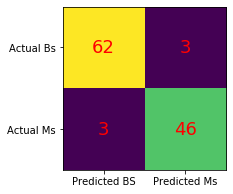


======= Logistic Regression Classification Report=========
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        65
           1       0.94      0.94      0.94        49

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [59]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_train = logreg.predict(x_train)
y_pred_test = logreg.predict(x_test)
print("======= Logistic Regression Accuracy=========")
print("Train Set Accuracy : ", accuracy_score(y_train, y_pred_train))
print("Test Set Accuracy  : ", accuracy_score(y_test, y_pred_test))
print('\n==== Logistic Regression Confusion Matrix=====')
#print(confusion_matrix(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted BS', 'Predicted Ms'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Bs', 'Actual Ms'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize = '18')
plt.show()
print("\n======= Logistic Regression Classification Report=========")
print(classification_report(y_test, y_pred_test))

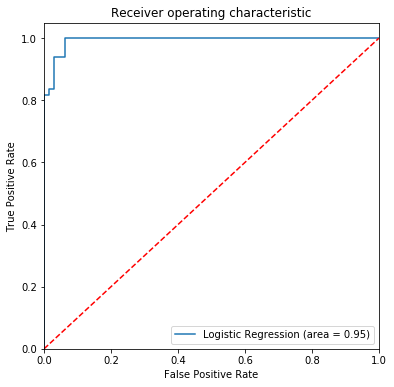

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [36]:
print(x_test.head(5)) #test dataset
print(y_pred_test[:5]) #predicted values)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
400        17.91         21.02          124.40      994.0          0.12300   
225        14.34         13.47           92.51      641.2          0.09906   
321        20.16         19.66          131.10     1274.0          0.08020   
173        11.08         14.71           70.21      372.7          0.10060   
506        12.22         20.04           79.47      453.1          0.10960   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
400           0.25760         0.31890              0.11980         0.2113   
225           0.07624         0.05724              0.04603         0.2075   
321           0.08564         0.11550              0.07726         0.1928   
173           0.05743         0.02363              0.02583         0.1566   
506           0.11520         0.08175              0.02166         0.2124   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
400

# LinearDiscriminantAnalysis

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_pred_train = lda.predict(x_train)
y_pred_test = lda.predict(x_test)
print("======= LinearDiscriminantAnalysis Accuracy=========")
print("Train Set Accuracy : ", accuracy_score(y_train, y_pred_train))
print("Test Set Accuracy  : ", accuracy_score(y_test, y_pred_test))
print('\n====LinearDiscriminantAnalysis Confusion Matrix=====')
print(confusion_matrix(y_test, y_pred_test))
print("\n======= LinearDiscriminantAnalysis Classification Report=========")
print(classification_report(y_test, y_pred_test))

======= LinearDiscriminantAnalysis Accuracy=========
Train Set Accuracy :  0.9648351648351648
Test Set Accuracy  :  0.956140350877193

====LinearDiscriminantAnalysis Confusion Matrix=====
[[65  0]
 [ 5 44]]

======= LinearDiscriminantAnalysis Classification Report=========
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        65
           1       1.00      0.90      0.95        49

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# DecisionTree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train, y_train)
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)
print("=======DT Accuracy=========")
print("Train Set Accuracy : ", accuracy_score(y_train, y_pred_train))
print("Test Set Accuracy  : ", accuracy_score(y_test, y_pred_test))
print('\n==== DT Confusion Matrix=====')
print(confusion_matrix(y_test, y_pred_test))
print("\n======= DT Classification Report=========")
print(classification_report(y_test, y_pred_test))

=======DT Accuracy=========
Train Set Accuracy :  0.9846153846153847
Test Set Accuracy  :  0.9649122807017544

==== DT Confusion Matrix=====
[[64  1]
 [ 3 46]]

======= DT Classification Report=========
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        65
           1       0.98      0.94      0.96        49

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



[Text(1119.0326086956522, 1494.8999999999999, 'concave points_worst <= 0.147\ngini = 0.46\nsamples = 455\nvalue = [292, 163]'),
 Text(855.195652173913, 1223.1, 'area_worst <= 957.45\ngini = 0.176\nsamples = 317\nvalue = [286, 31]'),
 Text(545.8695652173913, 951.3, 'concave points_worst <= 0.132\ngini = 0.095\nsamples = 299\nvalue = [284, 15]'),
 Text(291.1304347826087, 679.4999999999999, 'area_se <= 36.465\ngini = 0.049\nsamples = 277\nvalue = [270, 7]'),
 Text(145.56521739130434, 407.6999999999998, 'texture_worst <= 33.27\ngini = 0.008\nsamples = 259\nvalue = [258, 1]'),
 Text(72.78260869565217, 135.89999999999986, 'gini = 0.0\nsamples = 242\nvalue = [242, 0]'),
 Text(218.3478260869565, 135.89999999999986, 'gini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(436.695652173913, 407.6999999999998, 'texture_mean <= 21.435\ngini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(363.9130434782609, 135.89999999999986, 'gini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(509.4782608695652, 13

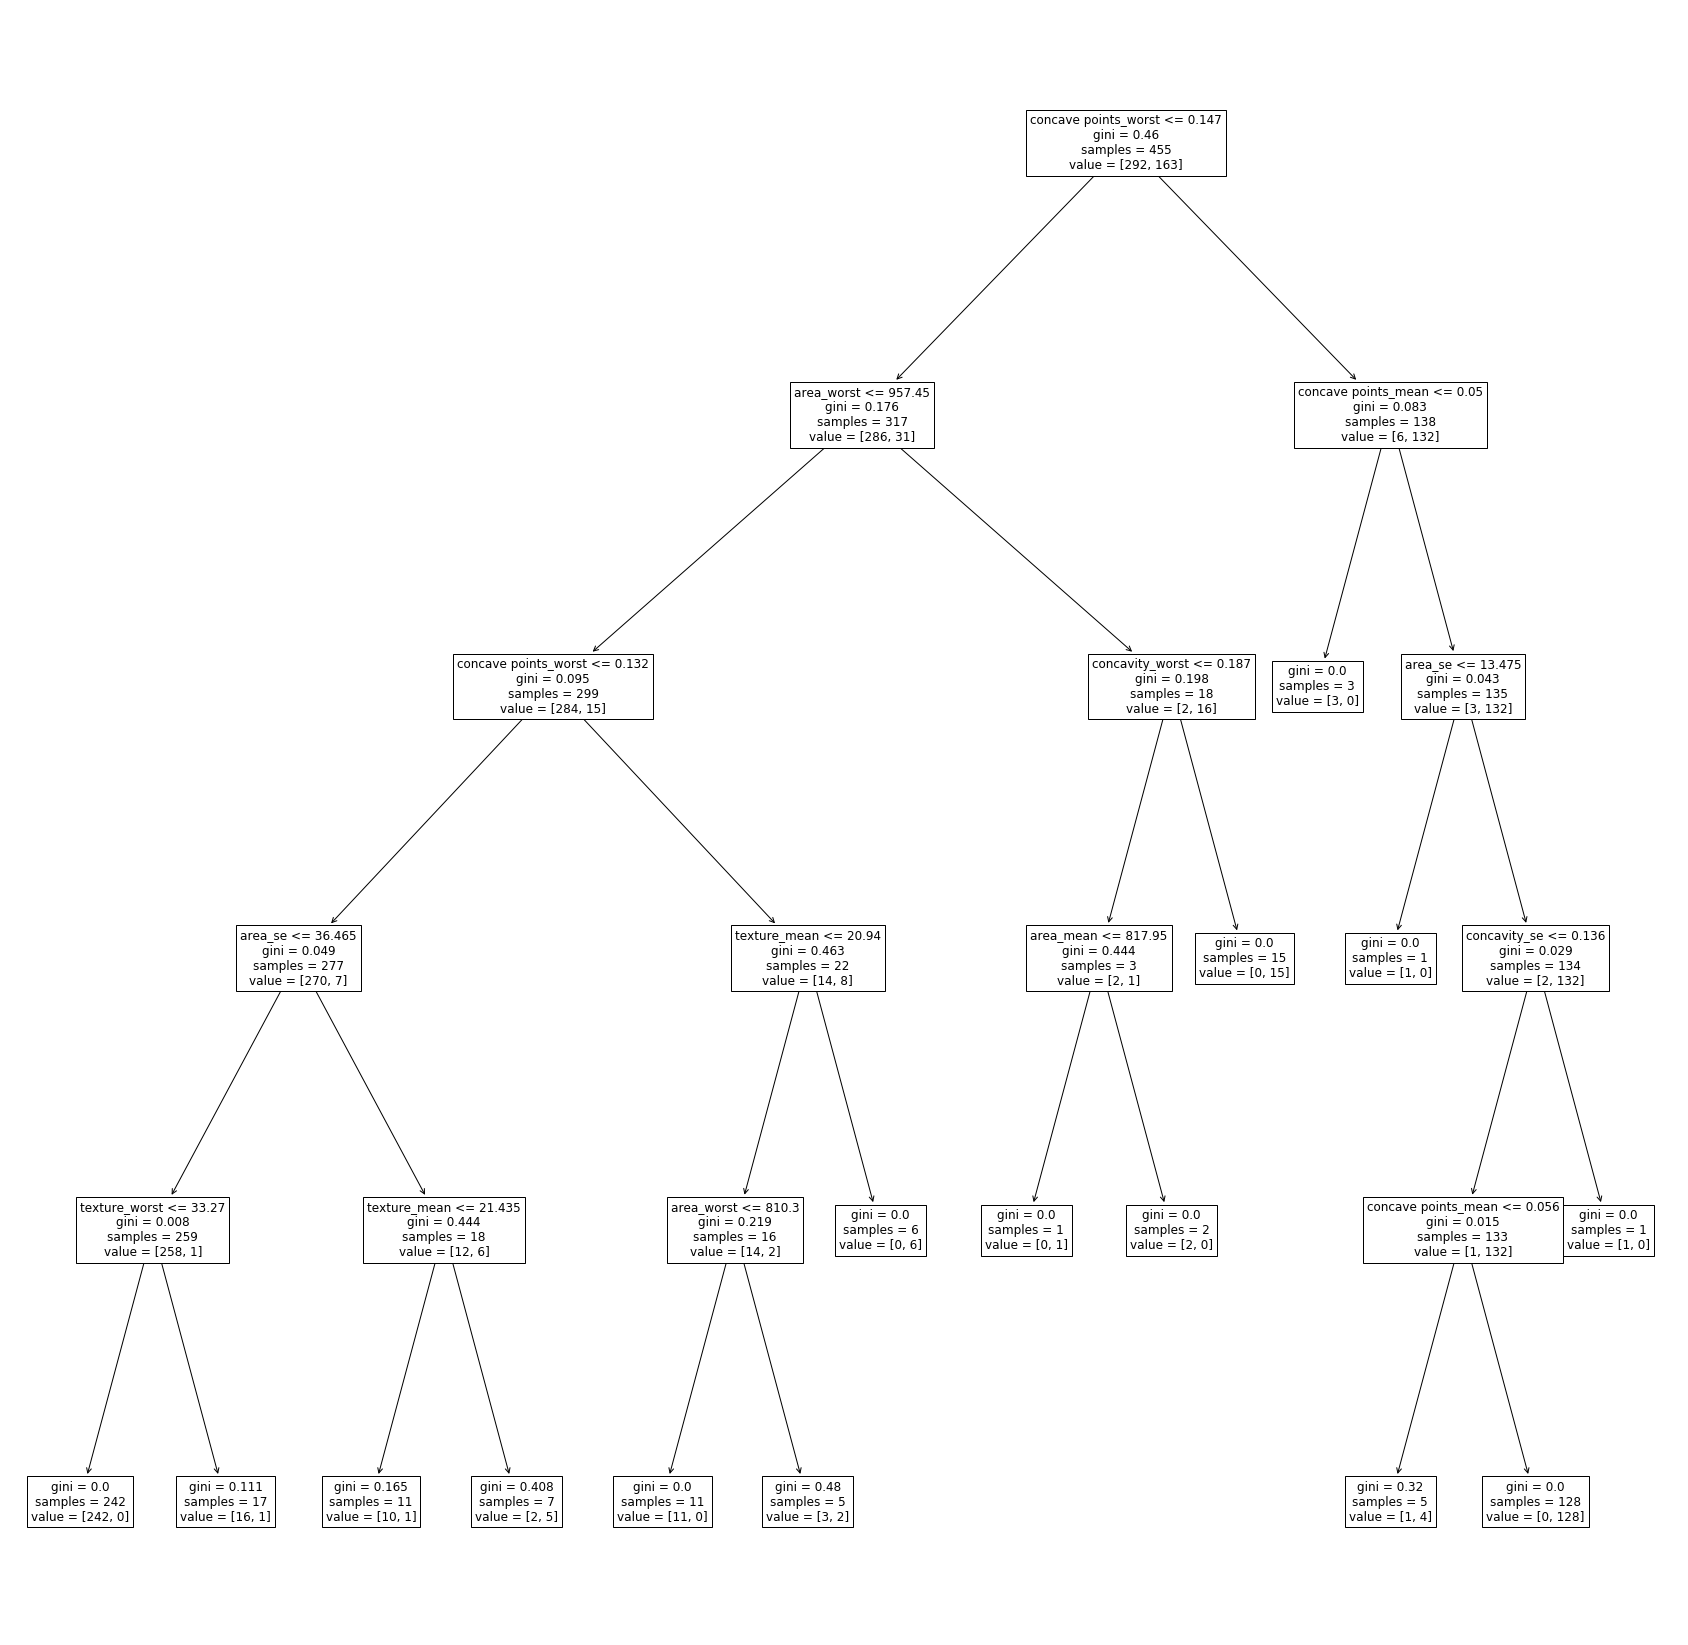

In [39]:
from sklearn.tree import plot_tree;
plot_tree(dt,feature_names = features_list,
          fontsize=12)

In [40]:
print(f"Breast Cancer Feature Importances: \n {format(dt.feature_importances_)} ")

Breast Cancer Feature Importances: 
 [0.00000000e+00 5.03710848e-02 0.00000000e+00 6.71178634e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.01857051e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.80903337e-02 0.00000000e+00 0.00000000e+00
 9.84284860e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.53345092e-04 0.00000000e+00 1.25777381e-01
 0.00000000e+00 0.00000000e+00 1.11863106e-02 7.37281205e-01
 0.00000000e+00 0.00000000e+00] 


#  RandomForest

In [41]:
%%time
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(n_estimators=100, verbose=2, n_jobs=2)
rdf.fit(x_train, y_train)
y_pred_train = rdf.predict(x_train)
y_pred_test = rdf.predict(x_test)
print("=======RDF Accuracy=========")
print("Train Set Accuracy : ", accuracy_score(y_train, y_pred_train))
print("Test Set Accuracy  : ", accuracy_score(y_test, y_pred_test))
print('\n==== RDF Confusion Matrix=====')
print(confusion_matrix(y_test, y_pred_test))
print("\n======= RDF Classification Report=========")
print(classification_report(y_test, y_pred_test))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


=======RDF Accuracy=========
Train Set Accuracy :  1.0
Test Set Accuracy  :  0.9649122807017544

==== RDF Confusion Matrix=====
[[64  1]
 [ 3 46]]

======= RDF Classification Report=========
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        65
           1       0.98      0.94      0.96        49

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Wall time: 927 ms


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [42]:
importances = list(rdf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print(' {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

 perimeter_worst      Importance: 0.17
 concave points_mean  Importance: 0.12
 concave points_worst Importance: 0.11
 area_worst           Importance: 0.09
 radius_mean          Importance: 0.06
 radius_worst         Importance: 0.06
 area_mean            Importance: 0.05
 area_se              Importance: 0.05
 perimeter_mean       Importance: 0.04
 concavity_mean       Importance: 0.04
 concavity_worst      Importance: 0.04
 texture_mean         Importance: 0.02
 radius_se            Importance: 0.02
 perimeter_se         Importance: 0.02
 texture_worst        Importance: 0.02
 smoothness_worst     Importance: 0.02
 compactness_worst    Importance: 0.02
 smoothness_mean      Importance: 0.01
 compactness_mean     Importance: 0.01
 compactness_se       Importance: 0.01
 concave points_se    Importance: 0.01
 symmetry_worst       Importance: 0.01
 fractal_dimension_worst Importance: 0.01
 symmetry_mean        Importance: 0.0
 fractal_dimension_mean Importance: 0.0
 texture_se           

In [43]:
x1 = edited.drop('diagnosis',axis=1)
y1 = edited['diagnosis'].values
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=100)
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier()
rdf.fit(x1_train, y1_train)
y1_pred_train = rdf.predict(x1_train)
y1_pred_test = rdf.predict(x1_test)
print("=======RDF Accuracy=========")
print("Train Set Accuracy : ", accuracy_score(y1_train, y1_pred_train))
print("Test Set Accuracy  : ", accuracy_score(y1_test, y1_pred_test))
print('\n==== RDF Confusion Matrix=====')
print(confusion_matrix(y1_test, y1_pred_test))
print("\n======= RDF Classification Report=========")
print(classification_report(y1_test, y1_pred_test))

=======RDF Accuracy=========
Train Set Accuracy :  1.0
Test Set Accuracy  :  0.956140350877193

==== RDF Confusion Matrix=====
[[63  2]
 [ 3 46]]

======= RDF Classification Report=========
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        65
           1       0.96      0.94      0.95        49

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



In [44]:
%%time
from sklearn.metrics import confusion_matrix, accuracy_score
CV_LR_clf = LogisticRegression(C=0.09, max_iter=1000, penalty='l2')
CV_LR_clf.fit(x_train, y_train)
accuracy_train = CV_LR_clf.score(x_train, y_train)
print("Train Accuracy: %.1f%%"% (accuracy_train*100))
accuracy_test = CV_LR_clf.score(x_test,y_test)
print("Test Accuracy: %.1f%%"% (accuracy_test*100))

Train Accuracy: 94.7%
Test Accuracy: 93.9%
Wall time: 72 ms


In [45]:
feature_imp=pd.Series(rdf.feature_importances_,index=data_edited_head).sort_values(ascending = False)
feature_imp

index
compactness_mean        0.143083
concavity_worst         0.130288
perimeter_se            0.129971
perimeter_mean          0.124961
concavity_mean          0.095369
diagnosis               0.065849
perimeter_worst         0.061290
concave points_worst    0.054721
radius_se               0.046542
radius_worst            0.045221
area_mean               0.035096
compactness_worst       0.024567
area_worst              0.016148
radius_mean             0.014296
concave points_mean     0.012599
dtype: float64

# KNN

In [46]:
#Do it again for KNN
x = data.drop('diagnosis',axis=1)
y = data['diagnosis'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)
print("=======KNN Accuracy=========")
print("Train Set Accuracy : ", accuracy_score(y_train, y_pred_train))
print("Test Set Accuracy  : ", accuracy_score(y_test, y_pred_test))
print('\n==== KNN Confusion Matrix=====')
print(confusion_matrix(y_test, y_pred_test))
print("\n======= KNN Classification Report=========")
print(classification_report(y_test, y_pred_test))

=======KNN Accuracy=========
Train Set Accuracy :  0.9406593406593406
Test Set Accuracy  :  0.9473684210526315

==== KNN Confusion Matrix=====
[[60  5]
 [ 1 48]]

======= KNN Classification Report=========
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        65
           1       0.91      0.98      0.94        49

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



# Gaussian NB

In [52]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_train = nb.predict(x_train)
y_pred_test = nb.predict(x_test)
print("=======NB Accuracy=========")
print("Train Set Accuracy : ", accuracy_score(y_train, y_pred_train))
print("Test Set Accuracy  : ", accuracy_score(y_test, y_pred_test))
print('\n==== NB Confusion Matrix=====')
print(confusion_matrix(y_test, y_pred_test))
print("\n======= NB Classification Report=========")
print(classification_report(y_test, y_pred_test))

=======NB Accuracy=========
Train Set Accuracy :  0.9428571428571428
Test Set Accuracy  :  0.9298245614035088

==== NB Confusion Matrix=====
[[62  3]
 [ 5 44]]

======= NB Classification Report=========
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        65
           1       0.94      0.90      0.92        49

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



# Support Vector Machine

In [48]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)
print("=======svm Accuracy=========")
print("Train Set Accuracy : ", accuracy_score(y_train, y_pred_train))
print("Test Set Accuracy  : ", accuracy_score(y_test, y_pred_test))
print('\n==== svm Confusion Matrix=====')
print(confusion_matrix(y_test, y_pred_test))
print("\n======= svm Classification Report=========")
print(classification_report(y_test, y_pred_test))

=======svm Accuracy=========
Train Set Accuracy :  0.9054945054945055
Test Set Accuracy  :  0.9473684210526315

==== svm Confusion Matrix=====
[[64  1]
 [ 5 44]]

======= svm Classification Report=========
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        65
           1       0.98      0.90      0.94        49

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



# Algorithm Comparison

In [49]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RDF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
    

In [53]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    

LR: 0.951546 (0.025953)
LDA: 0.960435 (0.025639)
KNN: 0.935990 (0.047117)
DT: 0.909807 (0.046893)
RDF: 0.953816 (0.023069)
NB: 0.940628 (0.017252)
SVM: 0.641787 (0.007986)


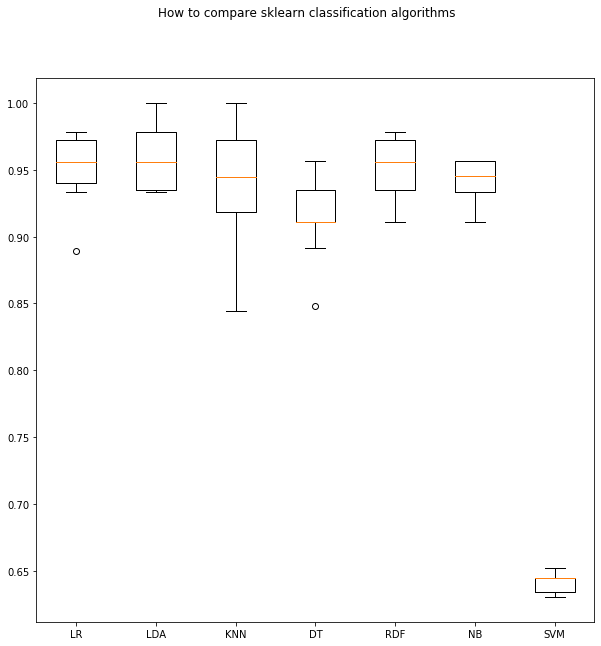

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()